In [28]:
#1. Flowchart
import random

def Print_values(a, b, c):
    if a > b:
        if b > c:
            print(a + b - 10 * c)
        else:
            if a > c:
                print(a + c - 10 * b)
            else:
                print(c + a - 10 * b)
    else:
        if b > c:
            print("None")
        else:
            print(c + b - 10 * a)

for i in range(3):
    a = random.randint(1, 20)
    b = random.randint(1, 20)
    c = random.randint(1, 20)
    print("test", i+1, "a=", a, "b=", b, "c=", c)
    Print_values(a, b, c)

print("a=5, b=15, c=10 reslut：")
Print_values(5, 15, 10)

test 1 a= 12 b= 8 c= 7
-50
test 2 a= 4 b= 6 c= 9
-25
test 3 a= 20 b= 14 c= 17
-103
a=5, b=15, c=10 reslut：
None


In [10]:
import math

def F(x):
    if x == 1:
        return 1
    next_x = math.ceil(x / 3)
    #递归
    return F(next_x) + 2 * x

numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for x in numbers:
    result = F(x)
    print(x, result)

1 1
2 5
3 7
4 13
5 15
6 17
7 21
8 23
9 25
10 33


In [30]:
#3. Dice rolling
#3.1
import functools

def find_number_of_ways_recursive(x, dice=10, faces=6):
    @functools.lru_cache(None) # 装饰器，自动缓存结果
    def solve(d, target):
        # 基础情况1: 如果目标和为0，并且骰子也用完了，说明找到一种方法
        if target == 0 and d == 0:
            return 1
        # 基础情况2: 如果目标和小于0或骰子用完了但和不为0，此路不通
        if target < 0 or d == 0:
            return 0
        # 递归：当前方法数 = 遍历当前骰子的所有可能点数k，
        # 然后累加“用剩下d-1个骰子凑成target-k”的方法数
        count = 0
        for k in range(1, faces + 1):
            count += solve(d - 1, target - k)
        return count
    return solve(dice, x)
    
print(f"总和10的方法数:",find_number_of_ways_recursive(10))
print(f"总和15的方法数:",find_number_of_ways_recursive(15))
print(f"总和30的方法数:",find_number_of_ways_recursive(30))
print(f"总和45的方法数:",find_number_of_ways_recursive(45))
print(f"总和60的方法数:",find_number_of_ways_recursive(60))

总和10的方法数: 1
总和15的方法数: 2002
总和30的方法数: 2930455
总和45的方法数: 831204
总和60的方法数: 1


In [6]:
#3. Dice rolling
#3.2
def count_all_sums(): 
    Number_of_ways = []
    max_ways = 0
    max_x = 10
    
    # 计算从10到60的每个x值
    for x in range(10, 61):
        ways = find_number_of_ways_recursive(x)
        Number_of_ways.append(ways)
        
        if ways > max_ways:
            max_ways = ways
            max_x = x
    
    return Number_of_ways, max_x, max_ways

print("\n3.2 计算所有可能总和的方式数:")
Number_of_ways, max_x, max_ways = count_all_sums()

print(f"方式数列表长度: {len(Number_of_ways)}")  
print(f"产生最大方式数的x值: {max_x}")
print(f"最大方式数: {max_ways}")


3.2 计算所有可能总和的方式数:
方式数列表长度: 51
产生最大方式数的x值: 35
最大方式数: 4395456


In [23]:
#4. Dynamic programming
#4.1
import random

# 4.1
def Random_integer(N):
    result = []
    for i in range(N):
        num = random.randint(0, 10)
        result.append(num)
    return result

arr = Random_integer(5)
print(arr)

[4, 5, 9, 5, 10]


In [32]:
#4. Dynamic programming
#4.2
def Sum_averages(arr):
    n = len(arr)
    dp_sum = [0] * (n + 1)
    dp_count = [0] * (n + 1)
    
    dp_count[0] = 1
    
    for num in arr:
        for k in range(n, 0, -1):
            dp_sum[k] = dp_sum[k] + dp_sum[k-1] + num * dp_count[k-1]
            dp_count[k] = dp_count[k] + dp_count[k-1]
    
    total = 0
    for k in range(1, n + 1):
        total = total + dp_sum[k] / k
    
    return total

test_arr_1 = [1, 2, 3]
test_arr_2 = [1, 2, 3, 4 , 5]
result_1 = Sum_averages(test_arr_1)
result_2 = Sum_averages(test_arr_2)
print(f"数组 {test_arr_1} 的结果: {result_1}")
print(f"数组 {test_arr_2} 的结果: {result_2}")

数组 [1, 2, 3] 的结果: 14.0
数组 [1, 2, 3, 4, 5] 的结果: 93.0


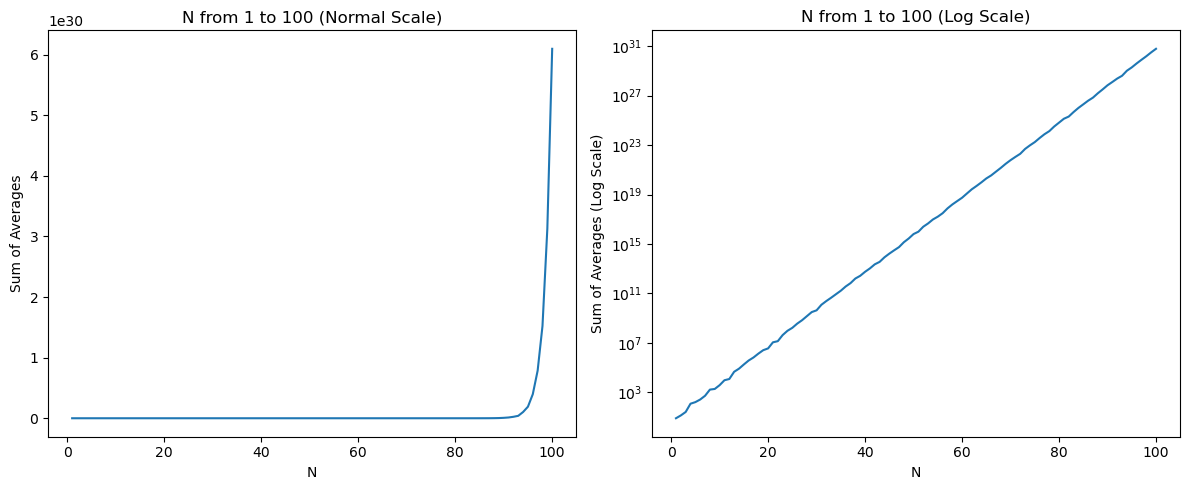

In [34]:
#4. Dynamic programming
#4.3

import matplotlib.pyplot as plt

# 调用函数，N从1到100
Total_sum_averages = []
for N in range(1, 101):
    arr = Random_integer(N)
    result = Sum_averages(arr)
    Total_sum_averages.append(result)

# 创建两个子图
plt.figure(figsize=(12, 5))

# 第一个图：普通坐标轴
plt.subplot(1, 2, 1)
plt.plot(range(1, 101), Total_sum_averages)
plt.xlabel('N')
plt.ylabel('Sum of Averages')
plt.title('N from 1 to 100 (Normal Scale)')

# 第二个图：对数坐标轴
plt.subplot(1, 2, 2)
plt.plot(range(1, 101), Total_sum_averages)
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Sum of Averages (Log Scale)')
plt.title('N from 1 to 100 (Log Scale)')

plt.tight_layout()
plt.show()


In [35]:
#5. Path counting
#5.1
import random

def create_matrix(N, M):
    # 创建N行M列的矩阵，全部初始化为0
    matrix = [[0 for _ in range(M)] for _ in range(N)]
    
    # 设置左上角和右下角为1
    matrix[0][0] = 1
    matrix[N-1][M-1] = 1
    
    # 随机填充其他位置为0或1
    for i in range(N):
        for j in range(M):
            if (i == 0 and j == 0) or (i == N-1 and j == M-1):
                continue  # 跳过左上角和右下角
            matrix[i][j] = random.randint(0, 1)
    
    return matrix

# 测试
matrix = create_matrix(3, 4)
for row in matrix:
    print(row)

[1, 0, 1, 0]
[0, 0, 1, 1]
[0, 1, 0, 1]


In [50]:
#5. Path counting
#5.2
def Count_path(matrix):
    N = len(matrix)
    M = len(matrix[0])
    
    # 创建DP表格，大小与矩阵相同
    dp = [[0 for _ in range(M)] for _ in range(N)]
    
    # 起点（左上角）
    dp[0][0] = 1 if matrix[0][0] == 1 else 0
    
    # 填充DP表格
    for i in range(N):
        for j in range(M):
            # 如果当前单元格是障碍物，路径数为0
            if matrix[i][j] == 0:
                dp[i][j] = 0
                continue
            
            # 如果不是障碍物，计算从左边和上边来的路径数
            if i > 0:
                dp[i][j] += dp[i-1][j]  # 从上边来
            if j > 0:
                dp[i][j] += dp[i][j-1]  # 从左边来
    
    # 返回右下角的路径数
    return dp[N-1][M-1]


test_matrix = create_matrix(3,3)
print("测试矩阵:")
for row in test_matrix:
    print(row)
print(f"路径数量: {Count_path(test_matrix)}")

测试矩阵:
[1, 1, 0]
[1, 1, 1]
[1, 1, 1]
路径数量: 5


In [58]:
#5. Path counting
#5.3
def run_simulation():
    N = 10
    M = 8
    total_paths = 0
    runs = 1000
    
    for i in range(runs):
        matrix = create_matrix(N, M)
        paths = Count_path(matrix)
        total_paths += paths
    
    mean_paths = total_paths / runs
    return mean_paths

mean_result = run_simulation()
print(f"1000次运行的平均路径数: {mean_result}")

1000次运行的平均路径数: 0.426
